In [1]:
import pandas as pd
import numpy as np
from ggplot import geom_point
from ggplot import *
%matplotlib inline


In [2]:
vehicles = pd.read_csv("data/vehicles.csv")
# vehicles.head

/usr/lib64/python3.4/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
column_names = vehicles.columns.values
column_names[[22, 23, 70, 71, 72, 73]]
len(vehicles)
len(pd.unique(vehicles.year))
min(vehicles.year)
max(vehicles['year'])

2016

In [4]:
pd.value_counts(vehicles.fuelType1)
pd.value_counts(vehicles.trany)
grouped = vehicles.groupby("year")
averaged = grouped['comb08', 'highway08', 'city08'].agg([np.mean])
averaged.columns = ['comb08_mean', 'highway08_mean', 'city08_mean']
averaged['year'] = averaged.index
averaged.reset_index
pd.set_option('display.notebook_repr_html', False)
y = ggplot(averaged, aes(x = 'year', y = 'comb08_mean')) + geom_point(color='steelblue')
print(averaged[averaged.year > 1996])


      comb08_mean  highway08_mean  city08_mean  year
year                                                
1997    19.429134       23.451444    17.135171  1997
1998    19.518473       23.546798    17.113300  1998
1999    19.611502       23.552817    17.272300  1999
2000    19.526190       23.414286    17.221429  2000
2001    19.479693       23.328211    17.275521  2001
2002    19.168205       23.030769    16.893333  2002
2003    19.000958       22.836207    16.780651  2003
2004    19.067736       23.064171    16.740642  2004
2005    19.193825       23.297599    16.851630  2005
2006    18.959239       23.048913    16.626812  2006
2007    18.978686       23.083481    16.605684  2007
2008    19.276327       23.455771    16.900590  2008
2009    19.740709       24.027872    17.336149  2009
2010    20.601443       24.972949    18.111812  2010
2011    21.103540       25.444248    18.674336  2011
2012    21.937554       26.418907    19.405898  2012
2013    23.253165       27.844726    20.702954

In [5]:
criteria1 = vehicles.fuelType1.isin(["Regular Gasoline","Premium Gasoline", "Midgrade Gasoline"])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != "Hybrid"
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]
len(vehicles_non_hybrid)


33294

In [6]:
grouped = vehicles_non_hybrid.groupby(['year'])
averaged = grouped['comb08'].agg([np.mean])
print(averaged)

           mean
year           
1984  19.121622
1985  19.394686
1986  19.320457
1987  19.164568
1988  19.367607
1989  19.141964
1990  19.031459
1991  18.838060
1992  18.861566
1993  19.137383
1994  19.092632
1995  18.872591
1996  19.530962
1997  19.368000
1998  19.329545
1999  19.239759
2000  19.169345
2001  19.075058
2002  18.950270
2003  18.761711
2004  18.967339
2005  19.005510
2006  18.786398
2007  18.987512
2008  19.191781
2009  19.738095
2010  20.466736
2011  20.920652
2012  21.496767
2013  22.330481
2014  22.431211
2015  22.575445
2016  23.328859


In [7]:
pd.unique(vehicles_non_hybrid.displ)

array([ 2. ,  4.9,  2.2,  5.2,  1.8,  1.6,  2.3,  2.8,  4. ,  5. ,  3.3,
        3.1,  3.8,  4.6,  3.4,  3. ,  5.9,  2.5,  4.5,  6.8,  2.4,  2.9,
        5.7,  4.3,  3.5,  5.8,  3.2,  4.2,  1.9,  2.6,  7.4,  3.9,  1.5,
        1.3,  4.1,  8. ,  6. ,  3.6,  5.4,  5.6,  1. ,  2.1,  1.2,  6.5,
        2.7,  4.7,  5.5,  1.1,  5.3,  4.4,  3.7,  6.7,  4.8,  1.7,  6.2,
        8.3,  1.4,  6.1,  7. ,  8.4,  6.3,  nan,  6.6,  6.4])

In [8]:
criteria = vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype('float')
criteria = vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')

/usr/lib64/python3.4/site-packages/pandas/core/generic.py:1974: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


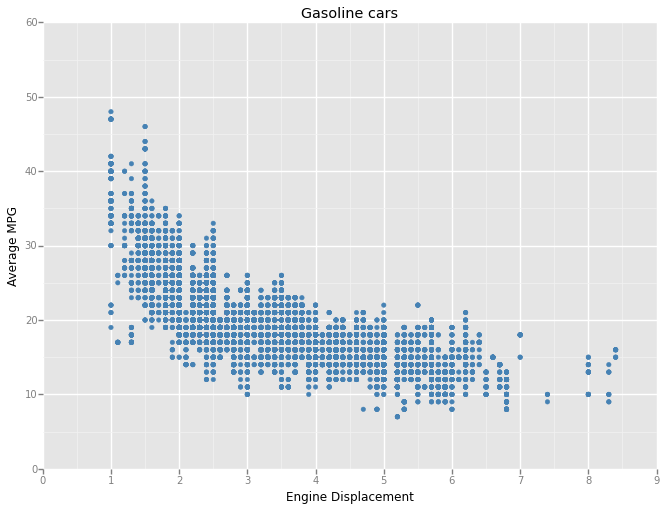

<ggplot: (8757914655962)>


In [9]:
print (ggplot(vehicles_non_hybrid, aes('displ', 'comb08')) + geom_point(color='steelblue') + \
       xlab("Engine Displacement") + ylab("Average MPG") + ggtitle("Gasoline cars") )

In [10]:
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year['displ', 'comb08'].agg([np.mean])
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year, id_vars='year')

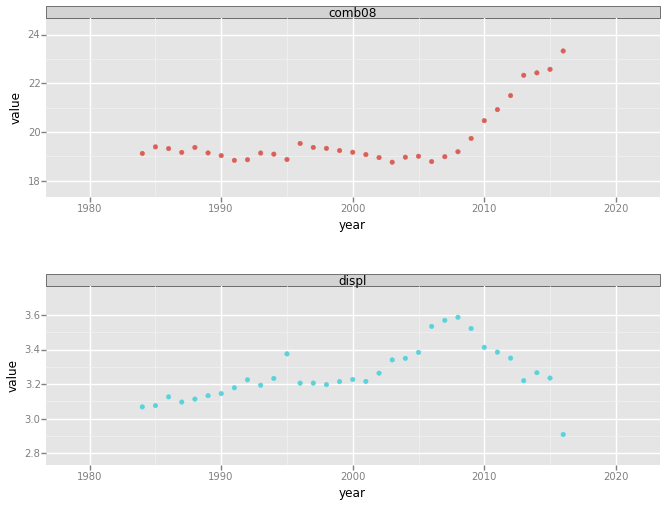

<ggplot: (8757914656944)>

In [11]:
p = ggplot(aes(x='year', y='value', color = 'variable_0'),
data=melted_avg_grouped_by_year)
p + geom_point() + facet_wrap("variable_0")

Axes(0.125,0.125;0.775x0.775)


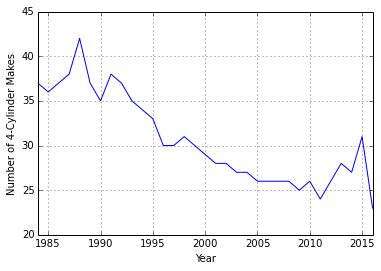

In [12]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)
vehicles_non_hybrid_4 = vehicles_non_hybrid[vehicles_non_hybrid.cylinders == 4] 
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig = grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print (fig)


In [13]:
from functools import reduce
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year'])
unique_makes = []
for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
unique_makes = reduce(set.intersection, unique_makes)
print(unique_makes)

{'Honda', 'Ford', 'Chevrolet', 'Volkswagen', 'Jeep', 'Mazda', 'Dodge', 'Mitsubishi', 'Toyota', 'Subaru'}


In [15]:
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)
df_common_makes = vehicles_non_hybrid_4[boolean_mask]
df_common_makes_grouped = df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

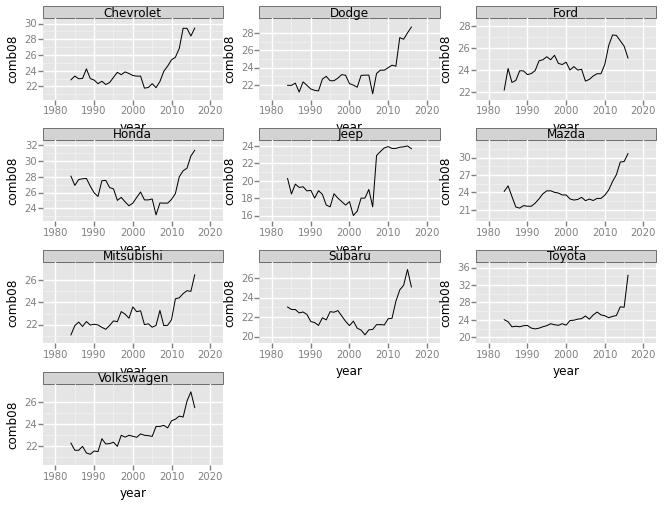

<ggplot: (8757913230400)>

In [17]:
ggplot(aes(x='year', y='comb08'), data = df_common_makes_grouped) + geom_line() + facet_wrap('make')